In [1]:
import math
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib._color_data as mcd
import matplotlib.patches as mpatch
from scipy.stats import norm

In [4]:
def log_norm(T, N, r, drift, vol, S0=100):
    dt = T/N
    p = (math.exp((r-drift)*dt) - math.exp(-vol*dt**0.5))/ \
        (math.exp(vol*dt**0.5)-math.exp(-vol*dt**0.5))
    Xs = np.random.binomial(1, p, N)
    path = []
    St = S0
    path.append(St)
    for xi in Xs:
        if xi == 0:
            xi = -1
        scale = math.exp(xi*dt**0.5+drift*dt)
        St = St * scale
        path.append(St)
    return path

def check_no_arbitrage(N, T, dft, vol, r):
    up_b = (N/T)**0.5
    down_b = - up_b
    mpr = (dft - r)/vol
    no_arbitrage = mpr< up_b and mpr> down_b
    return no_arbitrage

def plot_path(paths, names, T, tile='storck'):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    num = len(names)
    plt.figure(figsize=(6, 4))
    plt.rcParams['savefig.dpi'] = 200
    plt.rcParams['figure.dpi'] = 200
    for i in range(num):
        path_i = paths[i]
        num_ps = len(path_i)  
        index = [i*T/(num_ps-1) for i in range(num_ps)]
        plt.plot(index, path_i, color=colors[i], 
                 linestyle="-", linewidth=0.9, label=names[i])
        
    plt.xlabel('time')
    plt.ylabel('{} price'.format(tile))
    plt.title('{}_price@time'.format(tile))
    plt.legend()
    sns.set()
    plt.show()

N=10 fit no arbitrage condition
N=100 fit no arbitrage condition
N=1000 fit no arbitrage condition


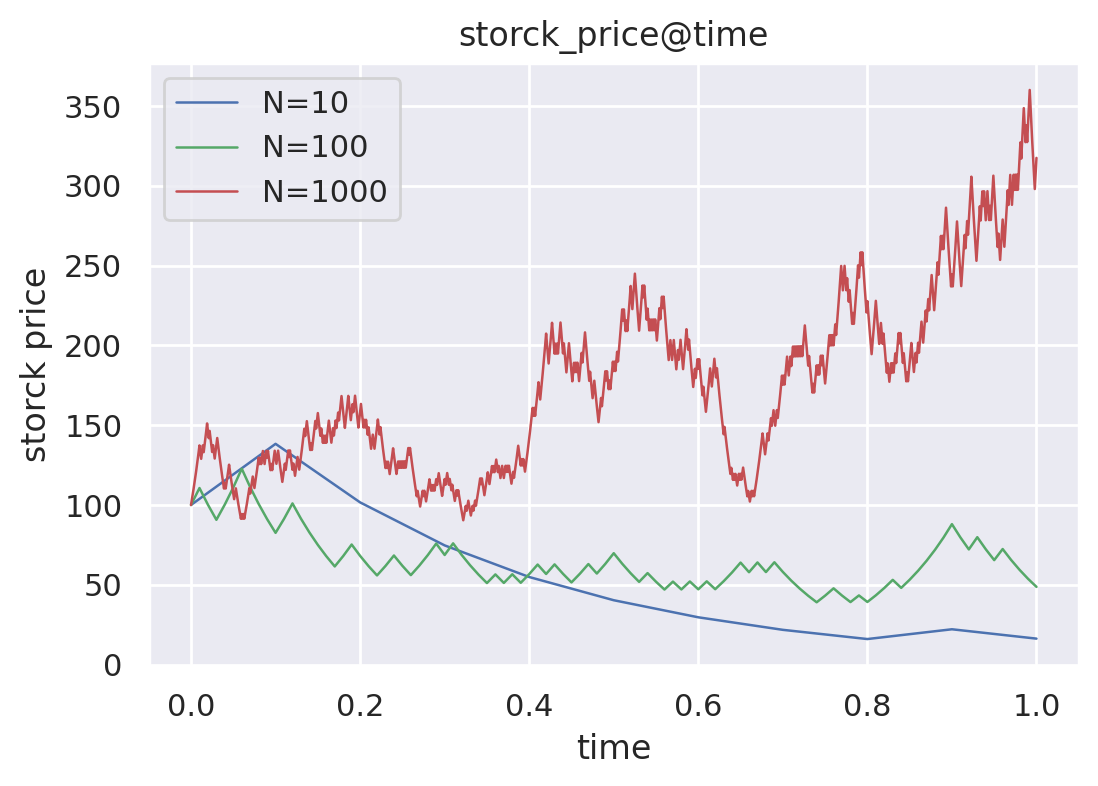

In [7]:
# Different values of delta T

T = 1
Ns = [10, 100, 1000]
r = 0.05
dft = 0.08
vol = 0.25
S0 = 100

for N in Ns:
    no_arbitrage = check_no_arbitrage(N, T, dft, vol, r)
    if no_arbitrage == True:
        print('N={} fit no arbitrage condition'.format(N))
    else:
        print('N={} does not fit no arbitrage condition'.format(N))
        
N = 10
path1 = log_norm(T, N, r, dft, vol, S0)
N = 100
path2 = log_norm(T, N, r, dft, vol, S0)
N = 1000
path3 = log_norm(T, N, r, dft, vol, S0)
paths = [path1, path2, path3]
names = ['N=10', 'N=100', 'N=1000']
plot_path(paths, names, T)

dft=0.1 fit no arbitrage condition
dft=0.15 fit no arbitrage condition
dft=0.2 fit no arbitrage condition
dft=0.25 fit no arbitrage condition
dft=0.3 fit no arbitrage condition


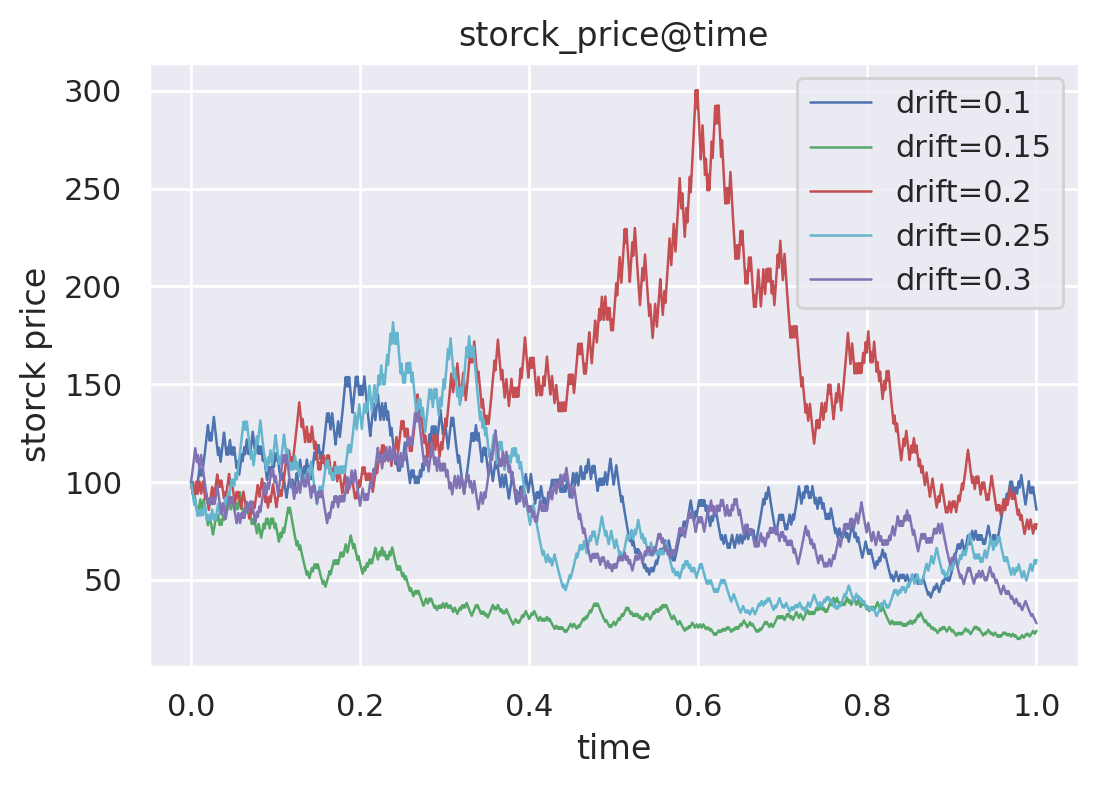

In [11]:
# Drifting

T = 1
N = 1000
r = 0.05
dfts = [ round(0.10+i*0.05, 3) for i in range(5)]
vol = 0.25
S0 = 100

for dft in dfts:
    no_arbitrage = check_no_arbitrage(N, T, dft, vol, r)
    if no_arbitrage == True:
        print('dft={} fit no arbitrage condition'.format(dft))
    else:
        print('dft={} does not fit no arbitrage condition'.format(dft))
        
paths = []
names = []
for dft_i in dfts:
    path = log_norm(T, N, r, dft_i, vol, S0)
    paths.append(path)
    names.append('drift={}'.format(dft_i))
plot_path(paths, names, T)

In [12]:
T = 1
N = 10000
r = 0.05
dfts = [random.uniform(0.1,0.5) for i in range(40)]
vol = 0.25
S0 = 100

STs = []
for dft_i in dfts:
    path = log_norm(T, N, r, dft_i, vol, S0)
    STs.append(path[-1])
X = np.vstack((STs, dfts))
np.cov(X)

array([[ 7.49582941e+03, -3.44399036e+00],
       [-3.44399036e+00,  1.20734662e-02]])

vol=0.1 fit no arbitrage condition
vol=0.15 fit no arbitrage condition
vol=0.2 fit no arbitrage condition
vol=0.25 fit no arbitrage condition
vol=0.3 fit no arbitrage condition
vol=0.35 fit no arbitrage condition


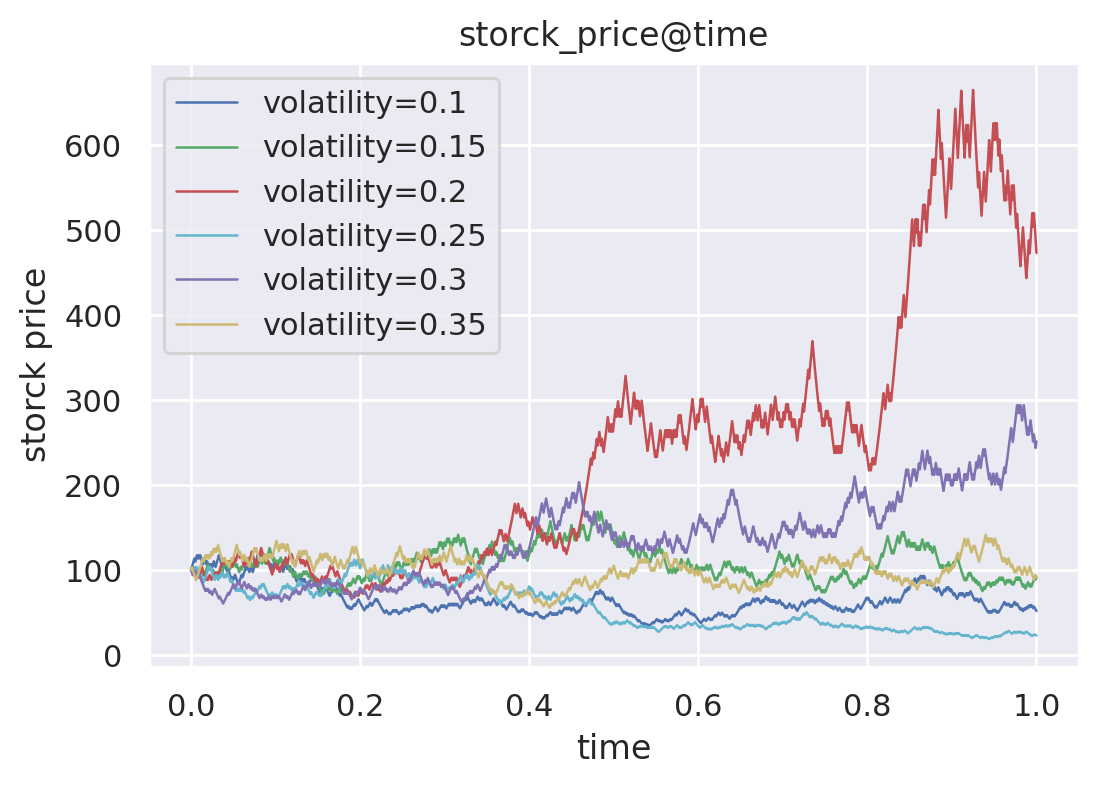

In [13]:
# Volatility

T = 1
N = 1000
r = 0.05
dft = 0.10
vols = [round(0.10+i*0.05, 3) for i in range(6)]
S0 = 100

for vol in vols:
    no_arbitrage = check_no_arbitrage(N, T, dft, vol, r)
    if no_arbitrage == True:
        print('vol={} fit no arbitrage condition'.format(vol))
    else:
        print('vol={} does not fit no arbitrage condition'.format(vol))
        
paths = []
names = []
for vol_i in vols:
    path = log_norm(T, N, r, dft, vol_i, S0)
    paths.append(path)
    names.append('volatility={}'.format(vol_i))
plot_path(paths, names, T)

r=0.05 fit no arbitrage condition
r=0.07 fit no arbitrage condition
r=0.09 fit no arbitrage condition
r=0.11 fit no arbitrage condition
r=0.13 fit no arbitrage condition


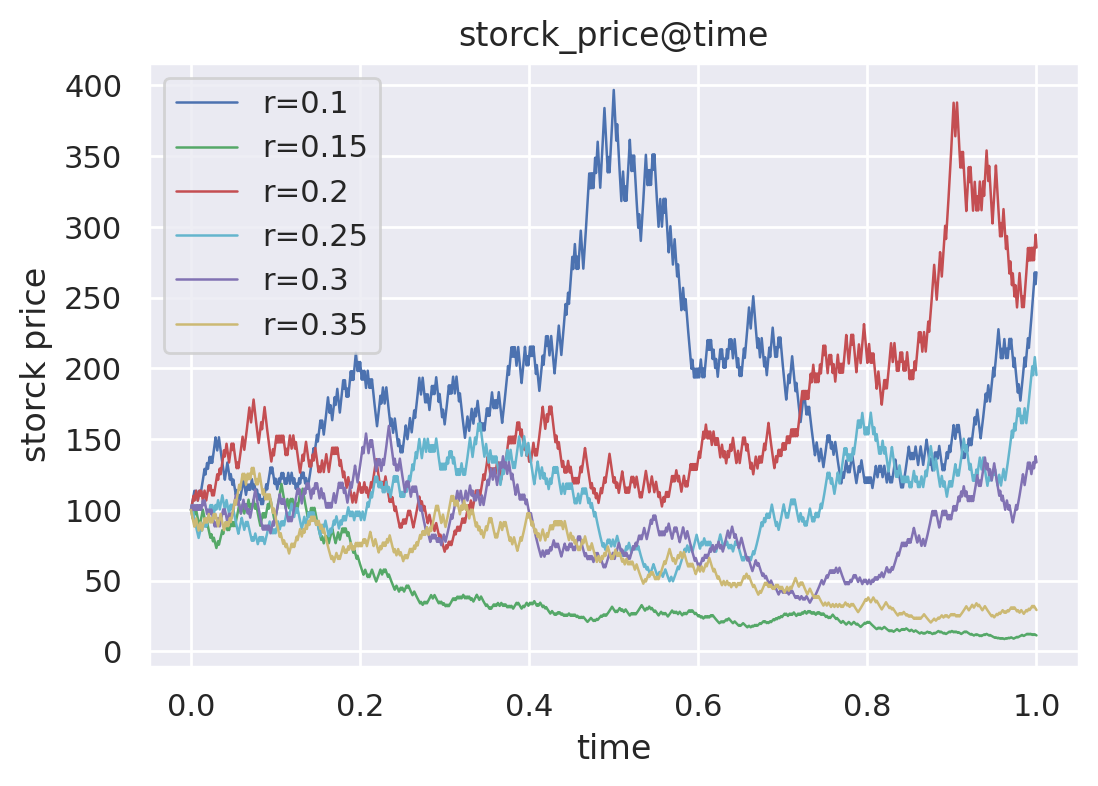

In [14]:
T = 1
N = 1000
rs = [round(0.05+i*0.02, 3) for i in range(5)]
dft = 0.10
vol = 0.20
S0 = 100

for r in rs:
    no_arbitrage = check_no_arbitrage(N, T, dft, vol, r)
    if no_arbitrage == True:
        print('r={} fit no arbitrage condition'.format(r))
    else:
        print('r={} does not fit no arbitrage condition'.format(r))
        
paths = []
names = []
for vol_i in vols:
    path = log_norm(T, N, r, dft, vol_i, S0)
    paths.append(path)
    names.append('r={}'.format(vol_i))
plot_path(paths, names, T)

r=0.05 fit no arbitrage condition


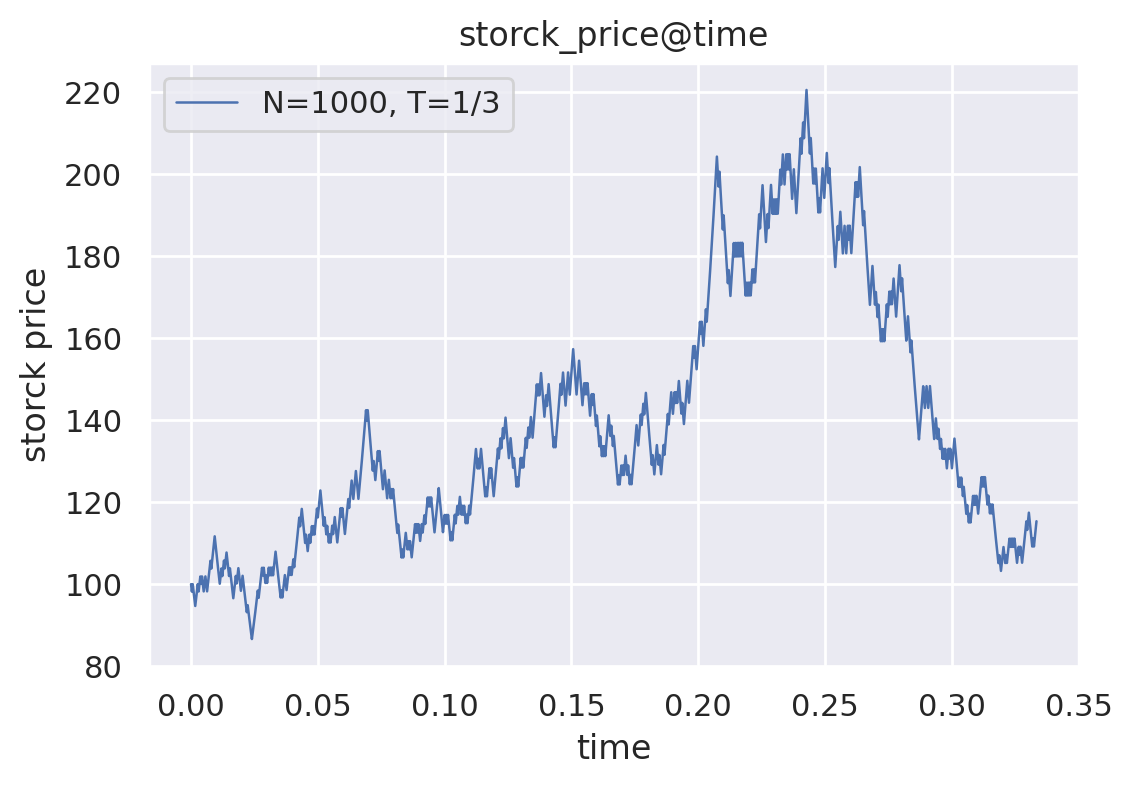

In [15]:
# Call price Simulation

K = 105
u = 1.1
d = 0.9
T = 4/12
N = 1000
r = 0.05
dft = 0.10
vol = 0.25
S0 = 100
paths = []
names = []
no_arbitrage = check_no_arbitrage(N, T, dft, vol, r)
if no_arbitrage == True:
    print('r={} fit no arbitrage condition'.format(r))
else:
    print('r={} does not fit no arbitrage condition'.format(r))
path = log_norm(T, N, r, dft, vol_i, S0)
paths.append(path)
names.append('N=1000, T=1/3')
plot_path(paths, names, T)

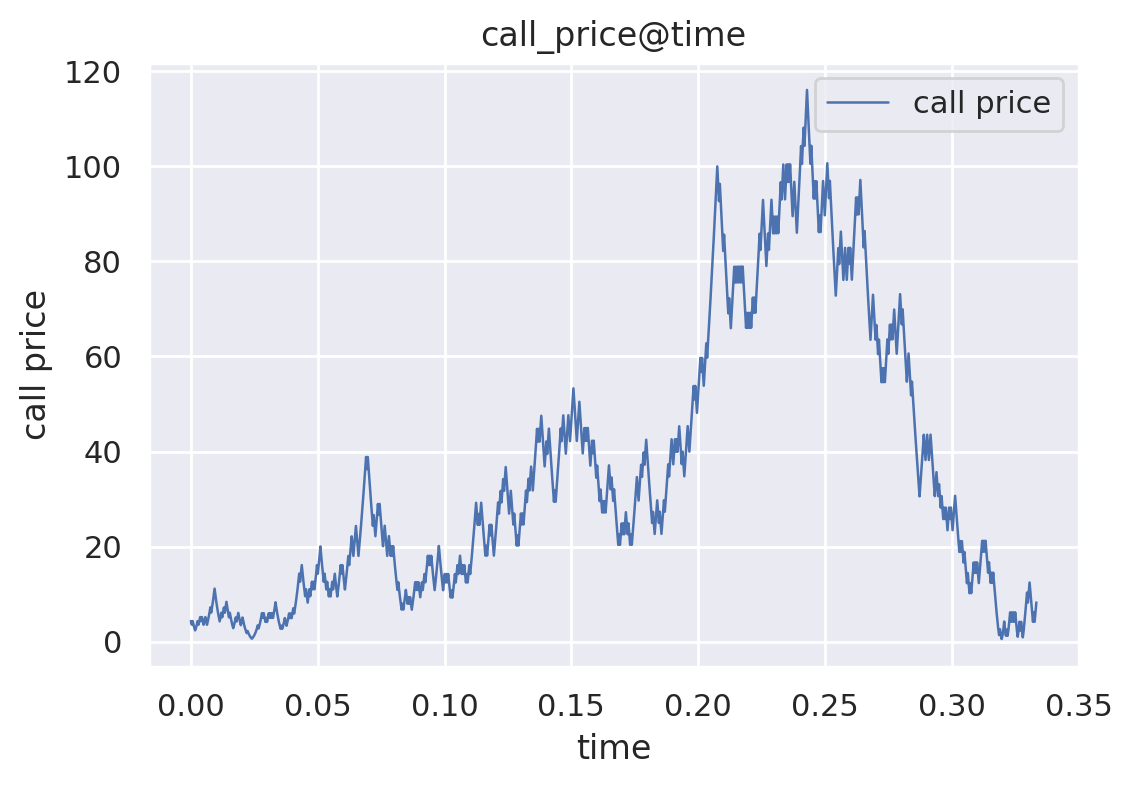

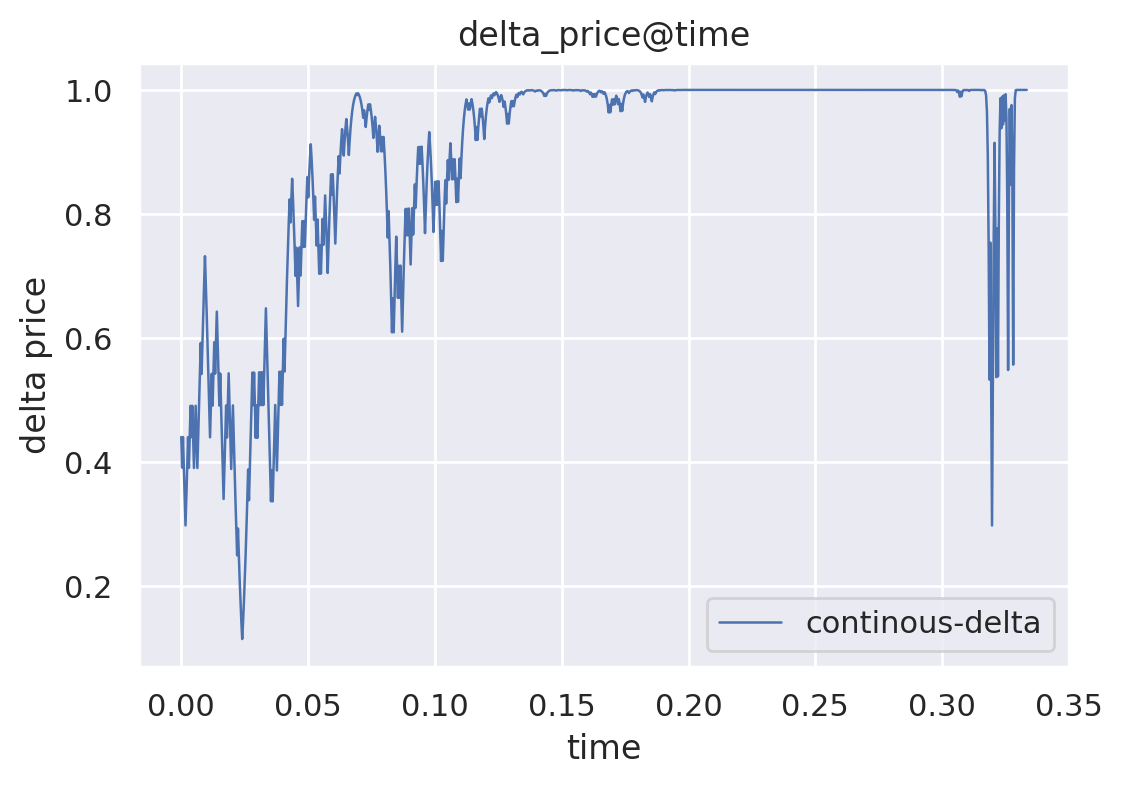

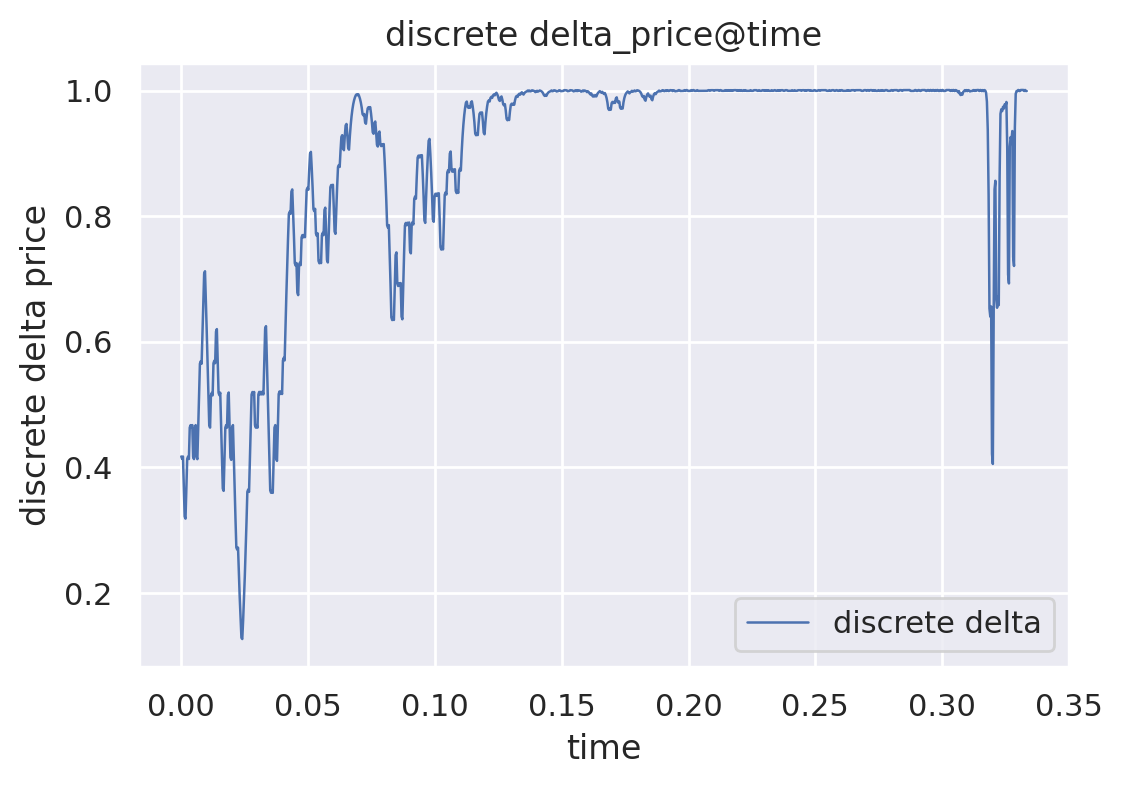

In [16]:
# Call price

def call0(St, K, r, vol, T):
    d1 = (math.log(St/K)+(r+0.5*vol**2)*T)/(vol*T**0.5)
    d2 = (math.log(St/K)+(r-0.5*vol**2)*T)/(vol*T**0.5)
    N1 = norm.cdf(d1)
    N2 = norm.cdf(d2)
    C = St*N1 - K*math.exp(-r*T)*N2
    Delta = N1
    return C, Delta

Cs = []
Deltas = []
for i in range(N):
    t = i*T/N
    Ti = T - t
    St = path[i]
    C_i, Delta_i = call0(St, K, r, vol, Ti)
    Cs.append(C_i)
    Deltas.append(Delta_i)

xp = math.exp(T/1000*r)
Deltas_discrete = []
for i, St in enumerate(Cs):
    if i < len(Cs)-1:
        C_plus = Cs[i+1]
        C_minus = Cs[i]
        S_plus = path[i+1]
        S_minus = path[i]
        Delta_i = (C_plus-C_minus)/(S_plus-S_minus)
        Deltas_discrete.append(Delta_i)
# plot
paths = [Cs,]
names = ['call price']
plot_path(paths, names, T, tile='call')
names = ['continous-delta']
paths = [Deltas]
plot_path(paths, names, T, tile='delta')
paths = [Deltas_discrete]
names = ['discrete delta']
plot_path(paths, names, T, tile='discrete delta')